#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/weatherAUS.csv')

In [4]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
dataset.shape

(145460, 23)

In [8]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [9]:
Y = dataset.iloc[:,-1].values
print(Y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [10]:
Y = Y.reshape(-1,1)
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


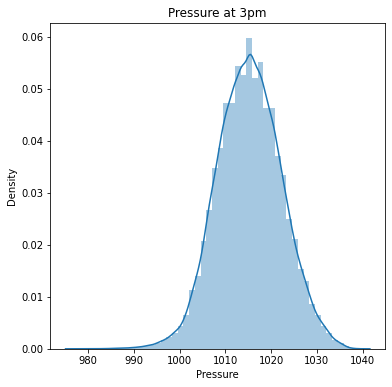

In [11]:
# Pressure3pm distribution
plt.figure(figsize=(6,6))
sns.distplot(dataset['Pressure3pm'])
plt.xlabel('Pressure')
plt.title('Pressure at 3pm')
plt.show()

#Dealing with invalid Data

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [13]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [14]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


#Encoding Dataset

In [15]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [16]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [17]:
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [18]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


# **Correlation after Data Cleaning**

In [21]:
df_1= np.concatenate((X,Y),axis=1)
dataframe_1 = pd.DataFrame(df_1,columns=['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm', 'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow'])

In [22]:
dataframe_1.shape

(145460, 20)

In [23]:
print(dataframe_1)

        Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0      -1.531666  0.191328 -0.041360 -0.203581     1.045228       0.327736   
1      -1.531666 -0.751052  0.268745 -0.275097     1.258262       0.327736   
2      -1.531666  0.112796  0.353318 -0.275097     1.471296       0.479465   
3      -1.531666 -0.468338  0.677518 -0.275097    -0.872075      -1.189550   
4      -1.531666  0.835287  1.283631 -0.155903     1.045228       0.100143   
...          ...       ...       ...       ...          ...            ...   
145455  1.209285 -1.473544  0.029118 -0.275097    -1.724209      -0.658500   
145456  1.209285 -1.347893  0.296936 -0.275097    -0.446007      -1.341279   
145457  1.209285 -1.065179  0.522466 -0.275097    -1.085108      -0.203314   
145458  1.209285 -0.688227  0.536562 -0.275097     0.193094      -0.886093   
145459  1.209285  0.426922 -0.450134 -0.275097     1.045228      -0.355043   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Hum

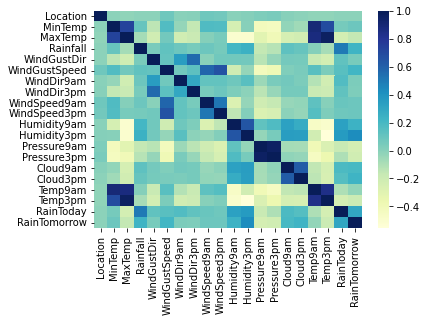

In [24]:
dataframe_1_corr = dataframe_1.corr()
sns.heatmap(dataframe_1_corr, cmap = 'YlGnBu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbab4d5d750>,
      dtype=object)

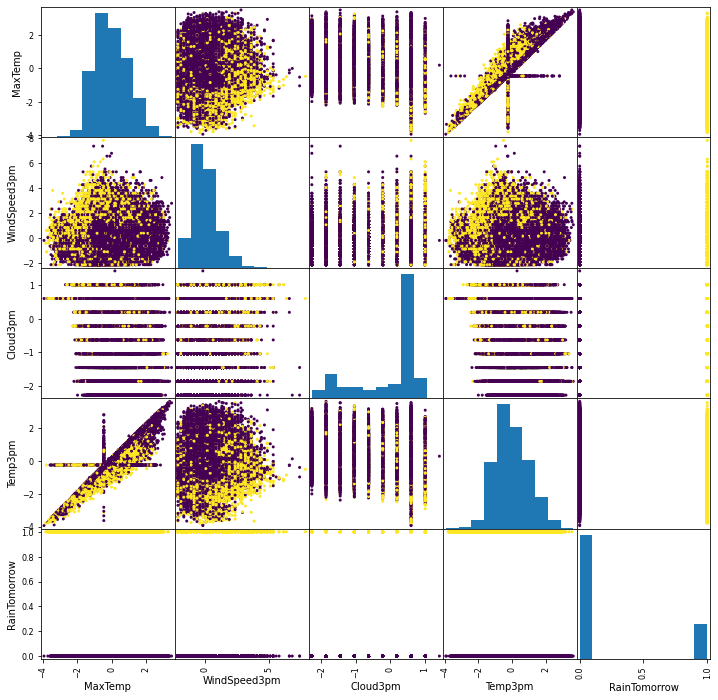

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataframe_1[['MaxTemp','WindSpeed3pm','Cloud3pm','Temp3pm','RainTomorrow']],c=dataframe_1['RainTomorrow'], figsize=(12,12), alpha=1)

#Splitting Dataset into Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
print(X_train)

[[ 0.22535368  1.03946939  0.07140543 ...  0.68369032  0.08145488
  -0.52979545]
 [ 1.42012717 -0.45263203  0.11369237 ... -0.41722163  0.22733303
  -0.52979545]
 [ 0.50647685 -0.20133073 -0.14002932 ... -0.06058818 -0.02065982
   1.88752093]
 ...
 [ 1.0687232   0.75675544  0.93124006 ...  1.10234698  1.07342629
  -0.52979545]
 [ 0.57675765 -0.04426743 -0.16822062 ...  0.01694083 -0.28324049
   1.88752093]
 [ 1.63096955 -0.0285611  -0.91529006 ... -0.35519842 -0.76463838
  -0.52979545]]


In [28]:
print(Y_train)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#**Training Model**

**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train, Y_train) #Training the model
pre_lr=LogisticRegression_model.score(X_train,Y_train)
print("Prediction Accuracy on Training Dataset using Logistic Regression is : ",pre_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction Accuracy on Training Dataset using Logistic Regression is :  0.8417778083321875


In [30]:
y_pred_LogisticRegression_model = le6.inverse_transform(np.array(LogisticRegression_model.predict(X_test),dtype=int))
Y_test_LogisticRegression_model = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,Y_train)
pre_clf=clf.score(X_train,Y_train)
print("Prediction Accuracy on Training Dataset using Decision Tree Classifier is : ",pre_clf)

Prediction Accuracy on Training Dataset using Decision Tree Classifier is :  0.9999398460057748


In [32]:
y_pred_clf = le6.inverse_transform(np.array(clf.predict(X_test),dtype=int))
Y_test_clf = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**MLP CLassifier**

In [33]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(2), activation="relu", max_iter=1000)
nnc.fit(X_train, Y_train)
pre_nnc=nnc.score(X_train, Y_train)
print("Prediction Accuracy on Training Dataset using  MLP Classifier is : ",pre_nnc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction Accuracy on Training Dataset using  MLP Classifier is :  0.8436769558641551


In [34]:
y_pred_nnc = le6.inverse_transform(np.array(nnc.predict(X_test),dtype=int))
Y_test_nnc = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest Classifier**

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)
pre_classifier=classifier.score(X_train,Y_train)
print("Prediction Accuracy on Training Dataset using Random Forest Classifier is : ",pre_classifier)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Prediction Accuracy on Training Dataset using Random Forest Classifier is :  0.9999312525780283


In [36]:
y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#**Calculating Prediction Accuracy on various ML Techniques**

In [37]:
#Logistic Regression
test_lr=accuracy_score(Y_test_LogisticRegression_model,y_pred_LogisticRegression_model)
print("Prediction Accuracy on Test Dataset using Logistic Regression is : ",test_lr)

Prediction Accuracy on Test Dataset using Logistic Regression is :  0.8428433933727485


In [38]:
print(f"\nClassification Report of Logistic Regression :\n\n{classification_report(Y_test_LogisticRegression_model,y_pred_LogisticRegression_model)}")


Classification Report of Logistic Regression :

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22726
         Yes       0.72      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [39]:
#Decision Tree Classifier
test_clf=accuracy_score(Y_test_clf,y_pred_clf)
print("Prediction Accuracy on Test Dataset using Decision Tree Classifier is : ",test_clf)

Prediction Accuracy on Test Dataset using Decision Tree Classifier is :  0.7887735459920253


In [40]:
print(f"\nClassification Report of Decision Tree Classifier :\n\n{classification_report(Y_test_clf,y_pred_clf)}")


Classification Report of Decision Tree Classifier :

              precision    recall  f1-score   support

          No       0.87      0.86      0.86     22726
         Yes       0.52      0.52      0.52      6366

    accuracy                           0.79     29092
   macro avg       0.69      0.69      0.69     29092
weighted avg       0.79      0.79      0.79     29092



In [41]:
#MLP Classifier
test_nnc=accuracy_score(Y_test_nnc,y_pred_nnc)
print("Prediction Accuracy on Test Dataset using MLP Classifier is : ",test_nnc)

Prediction Accuracy on Test Dataset using MLP Classifier is :  0.8444933315000688


In [42]:
print(f"\nClassification Report of MLP Classifier :\n\n{classification_report(Y_test_nnc,y_pred_nnc)}")


Classification Report of MLP Classifier :

              precision    recall  f1-score   support

          No       0.87      0.95      0.90     22726
         Yes       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [43]:
#Random Forest Classifier
test_rf=accuracy_score(Y_test,y_pred)
print("Prediction Accuracy on Test Dataset using Random Forest Classifier is : ",test_rf)

Prediction Accuracy on Test Dataset using Random Forest Classifier is :  0.8521930427608965


In [44]:
print(f"\nClassification Report of Random Forest Classifier:\n\n{classification_report(Y_test,y_pred)}")


Classification Report of Random Forest Classifier:

              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22726
         Yes       0.75      0.48      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



# **Visualization of Prediction of ML Algorithms**

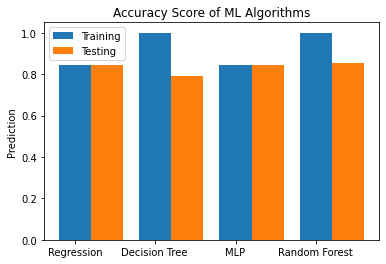

In [45]:
w = 0.4 # the width of the bars
labels = ['Regression', 'Decision Tree ', 'MLP', 'Random Forest']
train= [pre_lr, pre_clf,pre_nnc, pre_classifier]
test = [test_lr, test_clf, test_nnc, test_rf]

bar1= np.arange(len(labels)) 
bar2=[i+w for i in bar1] 

rects1 = plt.bar(bar1, train , w, label='Training')
rects2 = plt.bar(bar2, test , w, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Prediction')
plt.title('Accuracy Score of ML Algorithms')

plt.xticks(bar1,labels)
plt.legend()

plt.show()